In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
def IMFarrays(points): 
    salpeter = np.zeros_like(points)
    kroupa = np.zeros_like(points)
    various = np.zeros_like(points)
    #for mass in range(120):
    for mass in range(len(points)):
        salpeter[mass] = simpleIMFmass(points[mass],0.1,120,2.35)
        kroupa[mass] = simpleIMFmass(points[mass],0.1,120,1000)
        various[mass] = simpleIMFmass(points[mass],0.1,120,1230) # <--- this is where I would make x > 1000. See below
    return salpeter, kroupa, various                             # If x = 1230, then various[] should be a duplicate 
                                                                 # of kroupa[] 
#M_min = 0.1
#M_max = 120
def simpleIMFmass(m,M_min,M_max,x):
    """docstring for simpleIMFmass"""
    kroupaval = 1000
    M_mid = 0.5
    #If user enters an x value > 1000, adjust to make x value a negative integer. For example, if 1235 is entered
    #for x, then x becomes -2.35
    y = x
    if x > kroupaval:
        x = (kroupaval-x)/100.00
        #Solve for normalization constant
        A = ((1/(x+3))*((M_mid**(x+3))-(M_min**(x+3)))) + ((1/(x+2))*((M_max**(x+2))-(M_mid**(x+2))))
        B = 1/A                                    
        if m > M_mid:
            phi = B*(m**(x+1))
        else:
            phi = B*(m**(x+2))
    
    elif x == kroupaval:
        #M_mid = 0.5
        A = ((1/0.7)*((M_mid**0.7)-(M_min**0.7))) + ((-1/0.3)*((M_max**(-0.3))-(M_mid**(-0.3))))
        B = 1/A
        if m > M_mid:
            phi = B*(m**(-1.3))
        else:
            phi = B*(m**(-0.3))
    elif x != 2:
        B = (x-2)/((M_min**(2-x))-(M_max**(2-x)))
    else:
        B = 1/(np.log(M_max/M_min))
    if x == kroupaval:
        xi = phi
    elif y > kroupaval:
        #xi = B*(m**(x+1))
        xi = phi
    else:
        xi = B*(m**(1-x))
    return xi
 

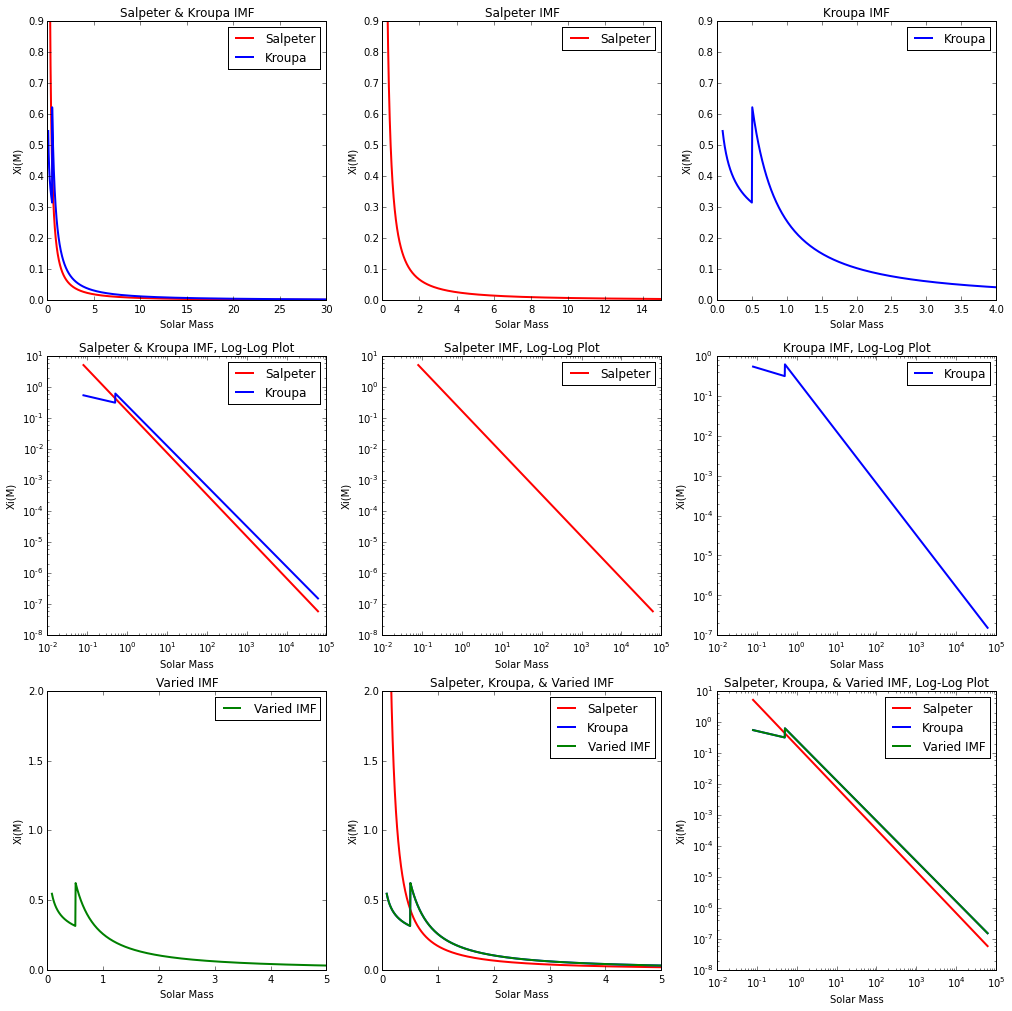

In [4]:
plot = plt.figure(1, figsize = (17,17))
xvals = np.logspace(np.log10(0.08),np.log(120),1200,endpoint=True)
spIMF, krIMF, varIMF = IMFarrays(xvals)



figure1 = plt.subplot(3,3,1)
plt.plot(xvals, spIMF, 'r',linewidth = 2.0, label = 'Salpeter')
plt.plot(xvals, krIMF, 'b',linewidth = 2.0, label = 'Kroupa')
plt.legend(loc = 'best')
plt.title('Salpeter & Kroupa IMF')
plt.xlabel('Solar Mass')
plt.ylabel('Xi(M)')
plt.xlim(0,30)
plt.ylim(0.0,0.9)

figure2 = plt.subplot(3,3,2)
plt.plot(xvals, spIMF, 'r',linewidth = 2.0, label = 'Salpeter')
plt.legend(loc = 'best')
plt.title('Salpeter IMF')
plt.xlabel('Solar Mass')
plt.ylabel('Xi(M)')
plt.xlim(0,15)
plt.ylim(0.0,0.9)

figure3 = plt.subplot(3,3,3)
plt.plot(xvals, krIMF, 'b',linewidth = 2.0, label = 'Kroupa')
plt.legend(loc = 'best')
plt.title('Kroupa IMF')
plt.xlabel('Solar Mass')
plt.ylabel('Xi(M)')
plt.xlim(0,4)
plt.ylim(0.0,0.9)

figure4 = plt.subplot(3,3,4)
plt.plot(xvals, spIMF, 'r',linewidth = 2.0, label = 'Salpeter')
plt.plot(xvals, krIMF, 'b',linewidth = 2.0, label = 'Kroupa')
plt.loglog()
plt.legend(loc = 'best')
plt.title('Salpeter & Kroupa IMF, Log-Log Plot')
plt.xlabel('Solar Mass')
plt.ylabel('Xi(M)')

figure5 = plt.subplot(3,3,5)
plt.plot(xvals, spIMF, 'r',linewidth = 2.0, label = 'Salpeter')
plt.loglog()
plt.legend(loc = 'best')
plt.title('Salpeter IMF, Log-Log Plot')
plt.xlabel('Solar Mass')
plt.ylabel('Xi(M)')

figure6 = plt.subplot(3,3,6)
plt.plot(xvals, krIMF, 'b',linewidth = 2.0, label = 'Kroupa')
plt.loglog()
plt.legend(loc = 'best')
plt.title('Kroupa IMF, Log-Log Plot')
plt.xlabel('Solar Mass')
plt.ylabel('Xi(M)')

figure7 = plt.subplot(3,3,7)
plt.plot(xvals, varIMF, 'g',linewidth = 2.0, label = 'Varied IMF')
plt.legend(loc = 'best')
plt.title('Varied IMF')
plt.xlabel('Solar Mass')
plt.ylabel('Xi(M)')
plt.xlim(0,5)
plt.ylim(0.0,2.0)

figure8 = plt.subplot(3,3,8)
plt.plot(xvals, spIMF, 'r',linewidth = 2.0, label = 'Salpeter')
plt.plot(xvals, krIMF, 'b',linewidth = 2.0, label = 'Kroupa')
plt.plot(xvals, varIMF, 'g',linewidth = 2.0, label = 'Varied IMF')
plt.legend(loc = 'best')
plt.title('Salpeter, Kroupa, & Varied IMF')
plt.xlabel('Solar Mass')
plt.ylabel('Xi(M)')
plt.xlim(0,5)
plt.ylim(0.0,2.0)

figure9 = plt.subplot(3,3,9)
plt.plot(xvals, spIMF, 'r',linewidth = 2.0, label = 'Salpeter')
plt.plot(xvals, krIMF, 'b',linewidth = 2.0, label = 'Kroupa')
plt.plot(xvals, varIMF, 'g',linewidth = 2.0, label = 'Varied IMF')
plt.loglog()
plt.legend(loc = 'best')
plt.title('Salpeter, Kroupa, & Varied IMF, Log-Log Plot')
plt.xlabel('Solar Mass')
plt.ylabel('Xi(M)')

In [36]:
def simpleIMFmass(m,M_min,M_max,x):
    """docstring for simpleIMFmass"""
    kroupaval = 1000
    M_mid = 0.5
    #If user enters an x value > 1000, adjust to make x value a negative integer. For example, if 1235 is entered
    #for x, then x becomes -2.35
    y = x
    if x > kroupaval:
        x = (kroupaval-x)/100.00
        #Solve for normalization constant
        A = ((1/(x+3))*((M_mid**(x+3))-(M_min**(x+3)))) + ((1/(x+2))*((M_max**(x+2))-(M_mid**(x+2))))
        B = 1/A                                    
        if m > M_mid:
            phi = B*(m**(x+1))
        else:
            phi = B*(m**(x+2))
    if y > kroupaval:
        xi = phi
        #xi = B*(m**(x+1))
    print x, A, B, xi

In [37]:
simpleIMFmass(0.6,0.1,120,1230)

-2.3 3.90543778801 0.256053240195 0.497431920125
